# AI-Powered Summarization: Essential Metrics for Gaining Insights from Large Content!
##### This guide outlines key metrics for text summarization, enhancing efficiency and impact in content analysis and interpretation, leveraging advanced algorithms and LLMs

##### With information constantly at our fingertips, we often face the problem of information overload. With so many articles, reports, and studies released daily, it can be challenging to find time to read everything. This is where summarization plays a vital role. Summarization allows us to break down large texts into shorter, clear summaries, making it easier to grasp the essential points quickly.
##### As artificial intelligence (AI) and natural language processing (NLP) continue to advance, the need for effective summarization becomes even more critical. However, not every summary is effective. Some may overlook key details, while others might misinterpret the original message.

##### So how can we measure the quality of a summary?

## What is the Summarization Score?
##### The Summarization Score is a metric that measures how well a summary conveys the main ideas from a larger text. At its foundation, the Summarization Score evaluates how effectively a summary incorporates important details from the original content.

## How is the Summarization Score calculated?
##### The process of calculating the summarization score involves the following steps.

- Find key phrases from the source content that carry important meanings.
- Convert these phrases into yes-or-no questions.
- Ensuring the summary answers these questions correctly based on the original text.
- Provide positive answers when facts or ideas are presented.
- Determine the Summarization Score by assessing how the summary’s responses align with the original text.
- A higher score means the summary has captured more accurate information.

In [ ]:
# ! pip -q install ragas

In [ ]:
long_content = """The G7 is a club of Western nations (with Japan given that status as an ally of the West and a major economy) that have dominated the world and its institutions, in some cases for centuries, and retain the ambition to maintain that position by policy coordination amongst themselves and by co-opting rising powers, including India, given the shifts in global power in recent decades.
The G7 recognised that they could not manage the 2008 financial crisis on their own and needed a wider international partnership, but one under their aegis. With this in mind, the G20 forum hitherto at the finance minister level was raised to the summit level. The G20 agenda is, however, shifting increasingly towards the interests and priorities of the developing countries (now being referred to as the Global South). During India’s G20 presidency, with India holding the Voice of the Global South summits before presiding over the G20 and at the conclusion of its work, and with the inclusion of the African Union as a G20 permanent member at India’s initiative, the pro-Global South content of the G20 agenda has got consolidated.
Both the G7 and the G20, however, face challenges from other platforms for consensus-building on global issues. BRICS, a group of non-Western countries, is getting expanded to resist the hegemony of the West that is still expressing itself in the form of sanctions, the weaponising of finance, regime change policies and double standards in addressing issues of democracy and human rights etc. An expanded BRICS will rival both the G7 and the G20 as a platform for promoting multipolarity, a greater role of developing countries in global governance, more equity in international relations, and introducing much-needed reforms in the international system."""

In [ ]:
from transformers import pipeline

# Define the summarization pipelines with various models
model_1 = pipeline("summarization", model="facebook/bart-large-cnn")
model_2 = pipeline("summarization", model="t5-base")
model_3 = pipeline("summarization", model="google/pegasus-xsum")
model_4 = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

# Prompt-based summarization - Specify word count in the prompt for T5
def prompt_based_summarization(model, content, max_words):
    prompt = f"summarize this content in {max_words} words: {content}"
    return model(prompt, max_length=200, min_length=50, do_sample=False)[0]['summary_text']

# Define the maximum number of words for the prompt
max_words = 100

# Generate summaries using different models
summary_1 = model_1(long_content, max_length=100, min_length=50, do_sample=False)[0]['summary_text']  # BART Model
summary_2 = prompt_based_summarization(model_2, long_content, max_words)  # T5 Model with prompt
summary_3 = model_3(long_content, max_length=100, min_length=50, do_sample=False)[0]['summary_text']  # Pegasus Model
summary_4 = model_4(long_content, max_length=100, min_length=50, do_sample=False)[0]['summary_text']  # DistilBART Model


# Print the generated summaries
print("Summary-1 (BART):", summary_1)
print("Summary-2 (T5 with prompt):", summary_2)
print("Summary-3 (Pegasus):", summary_3)
print("Summary-4 (DistilBART):", summary_4)


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Summary-1 (BART): The G20 agenda is shifting increasingly towards the interests and priorities of the developing countries. BRICS is getting expanded to resist the hegemony of the West. An expanded BRICS will rival both the G7 and the G20 as a platform for promoting multipolarity.
Summary-2 (T5 with prompt): the G7 recognises they cannot manage the 2008 financial crisis on their own . the agenda is shifting increasingly towards the interests and priorities of the developing countries . BRICS, a group of non-Western countries, is getting expanded to resist the hegemony of the west .
Summary-3 (Pegasus): The G7 and the G20 are two of the world’s most important international platforms for consensus-building and co-opting rising powers, including India, given the shifts in global power in recent decades, but face challenges from other platforms for consensus-building and co-opting rising powers, including India, given the shifts in global power in recent decades.
Summary-4 (DistilBART):  T

In [ ]:
summary_5 = """The G7, a group of Western nations including Japan, aims to maintain global dominance through policy coordination and cooperation with rising powers like India. In response to the 2008 financial crisis, the G20 was elevated to summit level to include broader international partnerships, increasingly prioritizing the Global South. Indias G20 presidency emphasized this shift, particularly by incorporating the African Union. Meanwhile, BRICS, expanding to counter Western hegemony, challenges both the G7 and G20 by advocating for multipolarity, enhancing the role of developing countries in global governance, and pushing for reforms in international relations."""

In [ ]:
from datasets import Dataset
from ragas.metrics import summarization_score
from ragas import evaluate
import os

In [ ]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
models = ['facebook/bart-large-cnn','t5-base', 'google/pegasus-xsum','DistilBART', 'GTP-4o']

In [ ]:
samples = {
    'reference_contexts': [[long_content] for i in range(len(models))],
    'response':[summary_1, summary_2, summary_3, summary_4, summary_5]

}
dataset = Dataset.from_dict(samples)
dataset

Dataset({
    features: ['reference_contexts', 'response'],
    num_rows: 5
})

In [ ]:
score = evaluate(dataset, metrics = [summarization_score])
df = score.to_pandas()
df

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

,reference_contexts,response,summary_score
0,[The G7 is a club of Western nations (with Jap...,The G20 agenda is shifting increasingly toward...,0.592666
1,[The G7 is a club of Western nations (with Jap...,the G7 recognises they cannot manage the 2008 ...,0.721778
2,[The G7 is a club of Western nations (with Jap...,The G7 and the G20 are two of the world’s most...,0.397862
3,[The G7 is a club of Western nations (with Jap...,The G20 agenda is shifting increasingly towar...,0.552711
4,[The G7 is a club of Western nations (with Jap...,"The G7, a group of Western nations including J...",0.702620


In [ ]:
df['models'] = models
df


,reference_contexts,response,summary_score,models
0,[The G7 is a club of Western nations (with Jap...,The G20 agenda is shifting increasingly toward...,0.592666,facebook/bart-large-cnn
1,[The G7 is a club of Western nations (with Jap...,the G7 recognises they cannot manage the 2008 ...,0.699556,t5-base
2,[The G7 is a club of Western nations (with Jap...,The G7 and the G20 are two of the world’s most...,0.397862,google/pegasus-xsum
3,[The G7 is a club of Western nations (with Jap...,The G20 agenda is shifting increasingly towar...,0.552711,DistilBART
4,[The G7 is a club of Western nations (with Jap...,"The G7, a group of Western nations including J...",0.702620,GTP-4o


<ipython-input-88-bbdee8a4c4a3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='summary_score', y='models', data=df, palette='viridis')


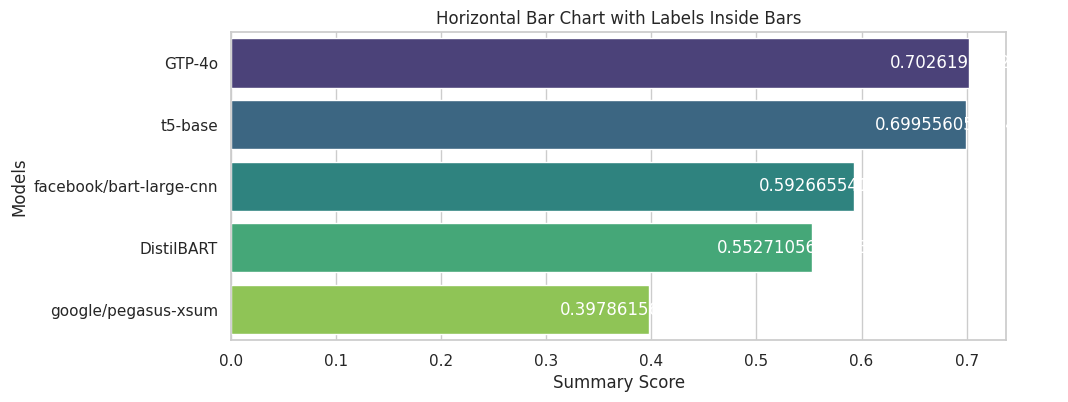

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style
sns.set(style="whitegrid")

df = df.sort_values(by='summary_score', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x='summary_score', y='models', data=df, palette='viridis')

# Add labels inside the bars
for index, value in enumerate(df['summary_score']):
    bar_plot.text(value, index, str(value), color='white', ha='center', va='center')

# Set titles and labels
plt.title('Horizontal Bar Chart with Labels Inside Bars')
plt.xlabel('Summary Score')
plt.ylabel('Models')

# Show the plot
plt.show()

## Conclusion
##### Grasping the Summarization Score is important for anyone involved in content creation, research, or natural language processing. It helps you assess the quality of your summaries and refine your summarization skills.
##### As technology evolves, reliable metrics like the Summarization Score will improve our ability to navigate the overwhelming amount of information we encounter. By prioritizing quality summarization, we can gain a clearer understanding of complex topics and make better decisions.